# Compile results

In [17]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../baselines/scripts')
from baselines_utils import read_image, save_image, KEY

METHOD = 'fans'

In [18]:
METHOD_LIST = os.listdir('../baselines')
METHOD_LIST = [m for m in METHOD_LIST if not m.startswith('scripts')]

assert METHOD in METHOD_LIST, f"Method {METHOD} not found in {METHOD_LIST}"

In [19]:
output_path = f"../baselines/{METHOD}/results/output.mat"

filtered_data = scipy.io.loadmat(output_path)
filtered_data = filtered_data[KEY]
filtered_data = np.log1p(np.abs(filtered_data))

In [22]:
input_path = "../../dataset/input_1.mat"

raw_data = scipy.io.loadmat(input_path)
raw_data = raw_data[KEY]
raw_data = 20 * np.log1p(np.abs(raw_data))

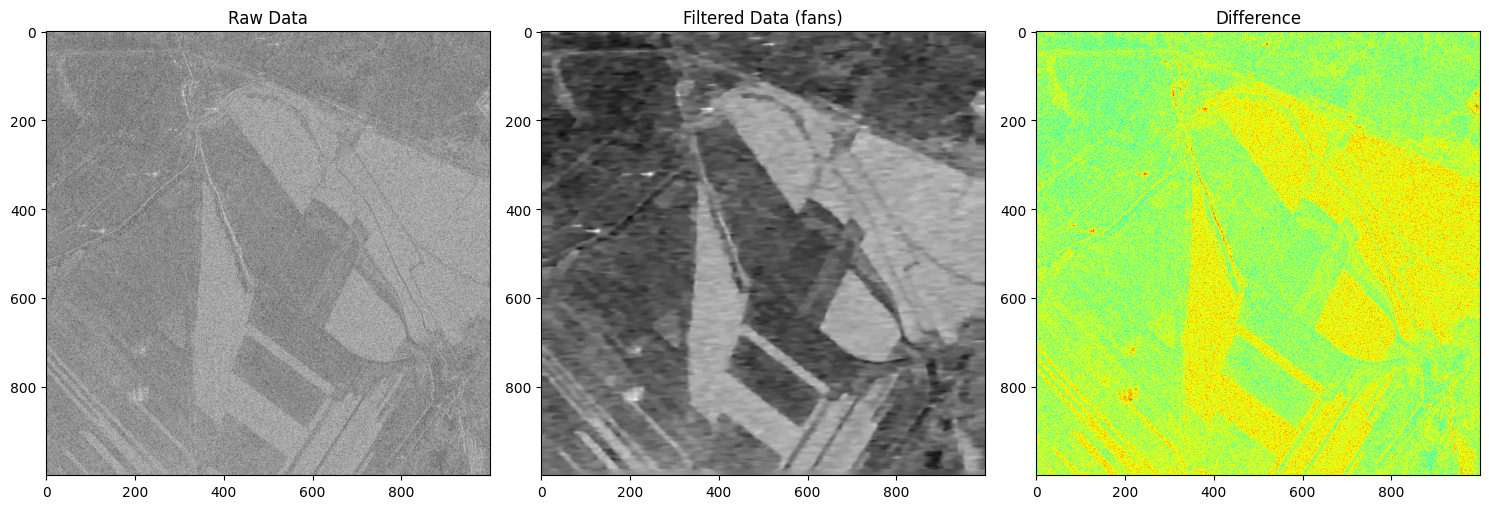

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(raw_data, cmap='gray')
plt.title('Raw Data')
plt.subplot(1, 3, 2)
plt.imshow(filtered_data, cmap='gray')
plt.title(f'Filtered Data ({METHOD})')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(raw_data - filtered_data), cmap='jet')
plt.title('Difference')
plt.tight_layout()